In [1]:
# ensure you have all modules installed in your kernel

# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install openpyxl
# !{sys.executable} -m pip install matplotlib

In [1]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates, ticker
import datetime
import os

In [48]:
# parameters for ploting
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.linewidth"] = 1.5

In [58]:
df1 = pd.read_excel(os.getcwd()+"\\Treated_Sheet\\SpreadsheetReportfromPython.xlsx").set_index('Metrics').transpose().reset_index().rename(columns={'index':'FIRETEAM'})
df1['FIRETEAM']=df['FIRETEAM'].apply(lambda x : x[:-20]) # removing unwated info from the fireteam string
df2 = pd.read_csv(os.getcwd()+"\\Treated_Sheet\\FormResponses.csv")
df = df1.join(df2)
df['OperationStartTime'] = pd.to_datetime(df.OperationStartTime,dayfirst=True)
df['DateOnly'] = df.OperationStartTime.dt.date
df = df.sort_values('OperationStartTime').reset_index(drop=True)

In [27]:
#Extracting full data
df.to_csv('FullData.csv')

In [15]:
# aux lists for plotting
statlist = ['Kills','Accur','ShotsF','ShotsH','Deaths','Stims','Accid','Samples'] # List of gathered stats
Enl = ['Automatons','Terminids','Illuminates']

# Sample Data report - 505th Ressugence regiment
This report comprises Information gatehred from a few deployments form the 505th. The stats team thanks the collaboarion of hosts on supplying this data

# Deployment graphs

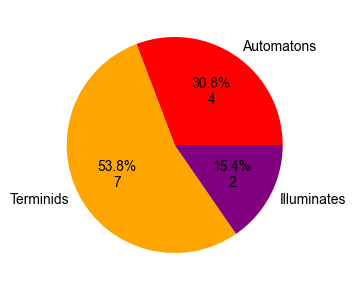

In [75]:
cl = ['red','orange','purple']
def func(pct, allvalues):
    absolute = int(pct / 100.*(np.sum(allvalues)+1))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig,ax = plt.subplots(figsize=(6,3))
plot1 = []
for i in range(3):
    plot1.append(len(df[df.Enemy==Enl[i]]))
ax.pie(plot1,labels=Enl,colors=cl,autopct=lambda pct: func(pct,plot1))
# ax.set_title('Number of Deployments - split by enemy')

plt.tight_layout()
plt.savefig(os.getcwd()+"\\Graphs\\EnemyPie.png")

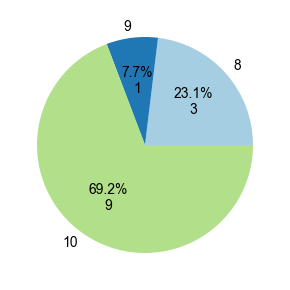

In [76]:
cl = ['red','orange','purple']
def func(pct, allvalues):
    absolute = int(pct / 100.*(np.sum(allvalues)+1))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig,ax = plt.subplots(figsize=(6,3))
plot1 = []
for i in range(8,11):
    plot1.append(len(df[df.Difficulty==i]))
ax.pie(plot1,labels=range(8,11),colors=plt.cm.Paired.colors,autopct=lambda pct: func(pct,plot1))
# ax.set_title('Number of Deployments - split by difficulty')

plt.tight_layout()
plt.savefig(os.getcwd()+"\\Graphs\\DiffPie.png")

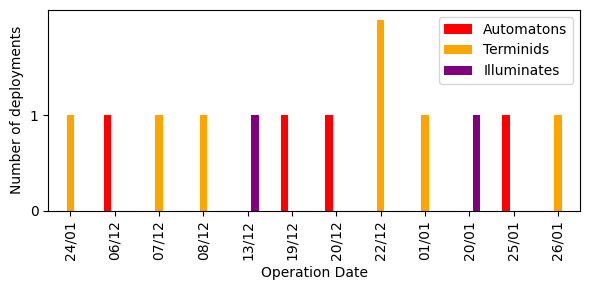

In [22]:
cl = ['red','orange','purple']
# fig,ax = plt.subplots(figsize=(6,3))
dfp = df.copy()
dfp.loc[dfp.Enemy=='Automatons','Automatons']=1
dfp.loc[dfp.Enemy=='Terminids','Terminids']=1
dfp.loc[dfp.Enemy=='Illuminates','Illuminates']=1
dfp=dfp.fillna(0)
dfp = dfp[['DateOnly','Automatons','Terminids','Illuminates']].groupby(by=['DateOnly']).sum()

ax = dfp.plot.bar(figsize=(6,3),color=cl)

ticks = [tick.get_text() for tick in ax.get_xticklabels()]
ticks = pd.to_datetime(ticks).strftime('%d/%m')
ax.set_xticklabels(ticks)

ax.set_xlabel('Operation Date')
ax.set_ylabel('Number of deployments')
ax.set_yticks([0,1])
ax.legend(loc='best')
# ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m"))
plt.tight_layout()

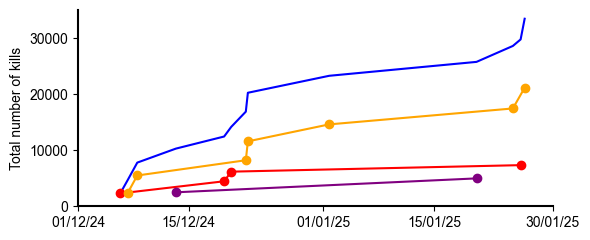

In [87]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,2.5))
ax.plot(df.OperationStartTime,df.KILLS.cumsum(),'-b',label='Total')
for i in range(3):
    dfp = df[df.Enemy == Enl[i]]
    ax.plot(dfp.OperationStartTime,dfp.KILLS.cumsum(),'o-',color=cl[i],label=Enl[i])
# ax.set_xlabel('Operation Date & Time')
ax.set_ylabel('Total number of kills')
# ax.set_title('Cummulative confirmed kills')
ax.xaxis.set_ticks(pd.DatetimeIndex(['2024-12-01','2024-12-15','2025-01-01','2025-01-15','2025-01-30']))
ax.set_yticks([0,10000,20000,30000])
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
plt.tight_layout()
plt.savefig(os.getcwd()+"\\Graphs\\CummKill.png")

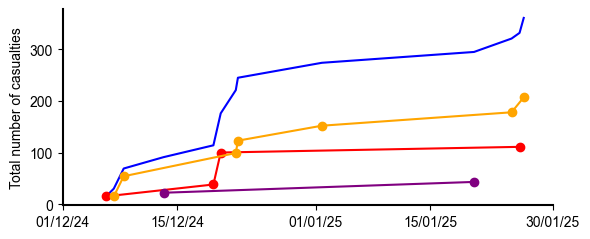

In [86]:
cl = ['red','orange','purple']
fig,ax = plt.subplots(figsize=(6,2.5))
ax.plot(df.OperationStartTime,df.DEATH.cumsum(),'-b',label='Total')
for i in range(3):
    dfp = df[df.Enemy == Enl[i]]
    ax.plot(dfp.OperationStartTime,dfp.DEATH.cumsum(),'o-',color=cl[i],label=Enl[i])
ax.set_ylabel('Total number of casualties')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
ax.xaxis.set_ticks(pd.DatetimeIndex(['2024-12-01','2024-12-15','2025-01-01','2025-01-15','2025-01-30']))
ax.set_yticks([0,100,200,300])
plt.tight_layout()
plt.savefig(os.getcwd()+"\\Graphs\\CummDeath.png")

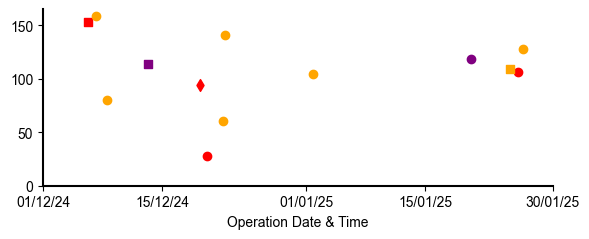

In [88]:
cl = ['red','orange','purple']
ml = ['s','d','o']
fig,ax = plt.subplots(figsize=(6,2.5))
# ax.plot(df.OperationStartTime,df.KILLS/df.DEATH,'-b',label='Total')
for i in range(3):
    for j in range(3):
        dfp = df[(df.Enemy == Enl[i])&(df.Difficulty == j+8)]
        ax.scatter(dfp.OperationStartTime,dfp.KILLS/dfp.DEATH,color=cl[i],marker=ml[j])
    # ax.plot(dfp.OperationStartTime,dfp.KILLS/dfp.DEATH,'o--',color=cl[i],label=Enl[i],alpha=0.5)
ax.set_xlabel('Operation Date & Time')
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%y"))
ax.xaxis.set_ticks(pd.DatetimeIndex(['2024-12-01','2024-12-15','2025-01-01','2025-01-15','2025-01-30']))
ax.set_yticks([0,50,100,150])
plt.tight_layout()
plt.savefig(os.getcwd()+"\\Graphs\\kdRATIO.png")

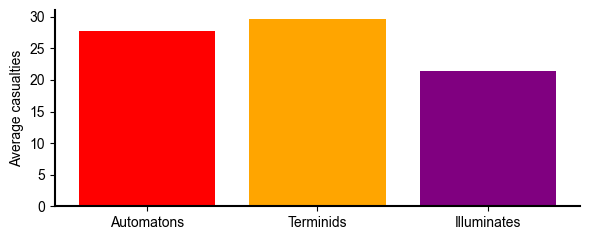

In [99]:
cl = ['red','orange','purple']
plist = []
for i in range(3):
    dfp = df[df.Enemy == Enl[i]]
    plist.append(round(dfp.DEATH.mean(),1))
    
fig,ax = plt.subplots(figsize=(6,2.5))
ax.set_ylabel('Average casualties')

ax.bar(Enl,plist,color=cl)
plt.tight_layout()
plt.savefig(os.getcwd()+"\\Graphs\\AvgCasualty.png")

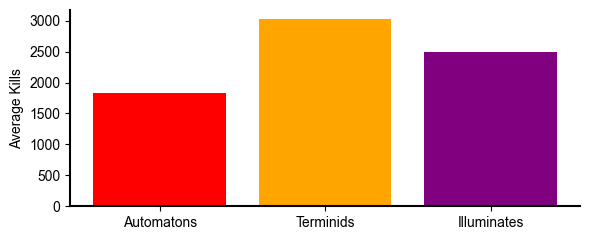

In [107]:
cl = ['red','orange','purple']
plist = []
for i in range(3):
    dfp = df[df.Enemy == Enl[i]]
    plist.append(round(dfp.KILLS.mean(),1))
    
fig,ax = plt.subplots(figsize=(6,2.5))
ax.set_ylabel('Average Kills')

ax.bar(Enl,plist,color=cl)
plt.tight_layout()
plt.savefig(os.getcwd()+"\\Graphs\\AvgKills.png")

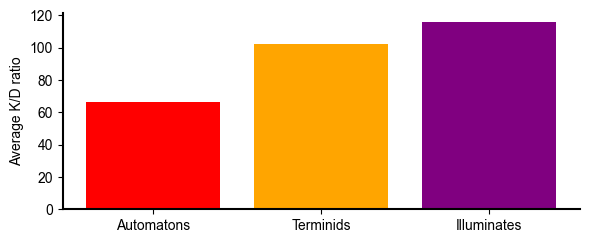

In [106]:
cl = ['red','orange','purple']
plist = []
for i in range(3):
    dfp = df[df.Enemy == Enl[i]]
    plist.append(round(dfp.KILLS.sum()/dfp.DEATH.sum(),1))
    
fig,ax = plt.subplots(figsize=(6,2.5))
ax.set_ylabel('Average K/D ratio')

ax.bar(Enl,plist,color=cl)
plt.tight_layout()
plt.savefig(os.getcwd()+"\\Graphs\\KDbarration.png")

In [90]:
print('Average Kills per Deployment (All three operations): '+ str(round(df.KILLS.mean(),1))+' --- '+str(round(df.KILLS.mean()/4,1))+' per helldiver')
print('Average Casualties per Deployment (All three operations): '+ str(round(df.DEATH.mean(),1))+' --- '+str(round(df.DEATH.mean()/4,1))+' per helldiver')
print('Average Kills/Casualty ratio: '+ str(round(df.KILLS.mean()/df.DEATH.mean(),1)))

Average Kills per Deployment (All three operations): 2574.6 --- 643.7 per helldiver
Average Casualties per Deployment (All three operations): 27.8 --- 6.9 per helldiver
Average Kills/Casualty ratio: 92.7


In [91]:
def prAut(skk): print("\033[91m {}\033[00m" .format(skk))
dfp = df[df.Enemy=='Automatons']
prAut('Average Kills per Deployment (All three operations): '+ str(round(dfp.KILLS.mean(),1))+' --- '+str(round(dfp.KILLS.mean()/4,1))+' per helldiver')
prAut('Average Casualties per Deployment (All three operations): '+ str(round(dfp.DEATH.mean(),1))+' --- '+str(round(dfp.DEATH.mean()/4,1))+' per helldiver')
prAut('Average Kills/Casualty ratio: '+ str(round(dfp.KILLS.mean()/dfp.DEATH.mean(),1)))

 Average Kills per Deployment (All three operations): 1835.2 --- 458.8 per helldiver
 Average Casualties per Deployment (All three operations): 27.8 --- 6.9 per helldiver
 Average Kills/Casualty ratio: 66.1


In [94]:
def prTer(skk): print("\033[33m {}\033[00m" .format(skk))
dfp = df[df.Enemy=='Terminids']
prTer('Average Kills per Deployment (All three operations): '+ str(round(dfp.KILLS.mean(),1))+' --- '+str(round(dfp.KILLS.mean()/4,1))+' per helldiver')
prTer('Average Casualties per Deployment (All three operations): '+ str(round(dfp.DEATH.mean(),1))+' --- '+str(round(dfp.DEATH.mean()/4,1))+' per helldiver')
prTer('Average Kills/Casualty ratio: '+ str(round(dfp.KILLS.mean()/dfp.DEATH.mean(),1)))

 Average Kills per Deployment (All three operations): 3021.7 --- 755.4 per helldiver
 Average Casualties per Deployment (All three operations): 29.6 --- 7.4 per helldiver
 Average Kills/Casualty ratio: 102.2


In [93]:
def prIll(skk): print("\033[95m {}\033[00m" .format(skk))
dfp = df[df.Enemy=='Illuminates']
prIll('Average Kills per Deployment (All three operations): '+ str(round(dfp.KILLS.mean(),1))+' --- '+str(round(dfp.KILLS.mean()/4,1))+' per helldiver')
prIll('Average Casualties per Deployment (All three operations): '+ str(round(dfp.DEATH.mean(),1))+' --- '+str(round(dfp.DEATH.mean()/4,1))+' per helldiver')
prIll('Average Kills/Casualty ratio: '+ str(round(dfp.KILLS.mean()/dfp.DEATH.mean(),1)))

 Average Kills per Deployment (All three operations): 2488.5 --- 622.1 per helldiver
 Average Casualties per Deployment (All three operations): 21.5 --- 5.4 per helldiver
 Average Kills/Casualty ratio: 115.7


In [ ]:
# To extract this report as an html file, use the following install nbconvert and use the following command: jupyter nbconvert --to html --no-input Statsreportv2.ipynb